## Python script to make US map (zoomed into California) using cartopy

In [21]:
#! /usr/bin/env python
# -*- coding: utf-8 -*-

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mticker


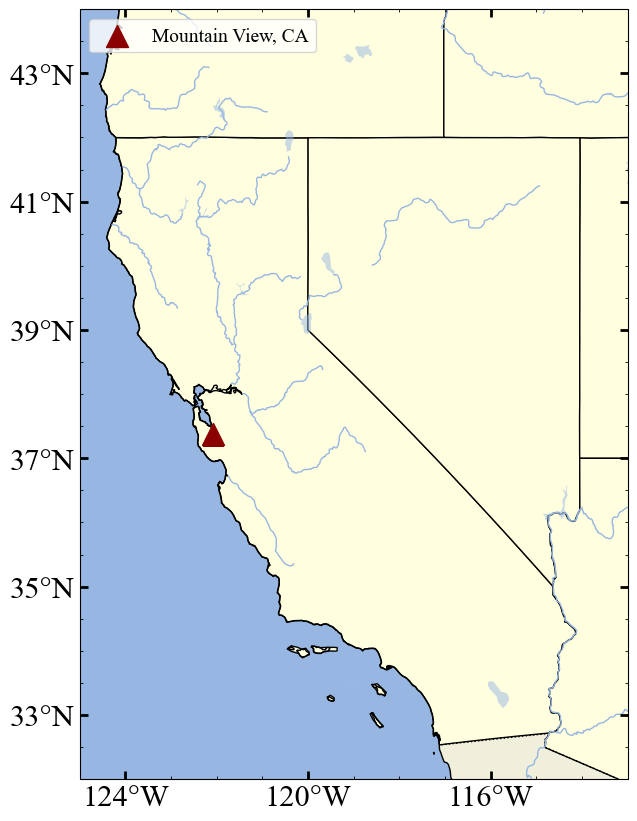

In [25]:
# Author       : Alejandro Prieto
# Created      : 2024-06-16
# Last Modified: 2024-09-11
# Vanderbilt University

plt.rcParams.update({
    'legend.title_fontsize': 'large',
    'axes.labelsize': 18,
    'font.size': 16,
    'legend.fontsize': 16,
    'font.family': 'serif',
   'font.serif' : 'times new roman',     
   # 'text.usetex': True,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.minor.visible': True,
    'ytick.minor.visible': True,
    'xtick.top': True,
    'ytick.right': True,
#    'figure.autolayout': True
})


def main():
    '''
    funtion to plot map of california using cartopy
    
    '''
    
    # function to format the longitude labels, degree - minutes - W/E
    def longitude_format_func(value, tick_number):
        return f'{-value:.0f}°W' if value < 0 else f'{value:.0f}°E'

    # function to format the latitude labels, degree - minutes - N/S
    def latitude_format_func(value, tick_number):
        return f'{-value:.0f}°S' if value < 0 else f'{value:.0f}°N' 

    # load data - US states shapefile
    us_states = gpd.read_file('cb_2018_us_state_20m.zip')

    # create the plot with Cartopy and add projection to add features
    fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([-125, -113, 32, 44])  # Set bounds to zoom into California

    # add misc topography data
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    # put a background image for sea rendering.
    # axb.stock_img()


    # plot the US states on the Cartopy Axes
    us_states.plot(ax=ax, color='lightyellow', edgecolor='black')

    # add a marker for Mountain View, California
    mv_coords = [-122.083855, 37.386051]  # [longitude, latitude]
    ax.scatter(mv_coords[0], mv_coords[1], color='darkred', marker='^', s=250, zorder=5, label='Mountain View, CA')

    # set the tick locations
    xticks = [-124, -120, -116]
    yticks = [33, 35, 37, 39, 41, 43]

    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    ## set tick labels with formatters
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(longitude_format_func))
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(latitude_format_func))    
    ## Customize tick parameters
    ax.tick_params(axis='both', which='major', labelsize=22, length=6, width=2, colors='black', labelcolor='black')

#     from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter ## alternative formatter
#     ax.xaxis.set_major_formatter(LongitudeFormatter())
#     ax.yaxis.set_major_formatter(LatitudeFormatter())


    #custom tick labels using cartopy
#     gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), linewidth=0)
#     gl.xlabels_top = False
#     gl.ylabels_right = False
#     gl.xformatter = mticker.FuncFormatter(longitude_format_func)
#     gl.yformatter = mticker.FuncFormatter(latitude_format_func)
#     gl.xlabel_style = {'size': 22, 'color': 'black'}
#     gl.ylabel_style = {'size': 22, 'color': 'black'}

#     # set the tick locations for catopy formatiting, overides matplotlib tick parameters
#     gl.xlocator = mticker.FixedLocator(xticks)
#     gl.ylocator = mticker.FixedLocator(yticks)

    # add legend
    ax.legend(facecolor='white', loc='upper left', fontsize=14)

   
    plt.show()

# call the function to plot the main
if __name__ == '__main__':
    main()


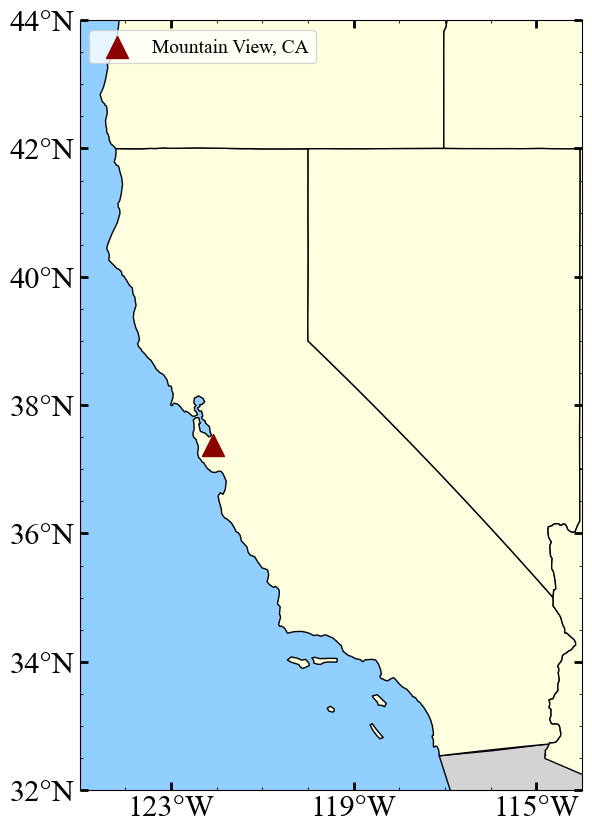

In [26]:


def plot_california_map_with_marker():
    plt.rcParams['axes.facecolor'] = '90cfff'  # represents ocean color

    # load the naturalearth_lowres dataset from GeoPandas
    world = gpd.read_file(
        "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
    mexico = world[world["ADMIN"] == "Mexico"]

    # Load the US states shapefile
    us_states = gpd.read_file('cb_2018_us_state_20m.zip')

    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    mexico.plot(ax=ax, color='lightgray', edgecolor='black')
    us_states.plot(ax=ax, color='lightyellow', edgecolor='black')

    # Set bounds to zoom into California
    ax.set_xlim(-125, -114)
    ax.set_ylim(32, 44)
    
    from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter ## alternative formatter
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())


    # coordinates of Mountain View, California
    mv_coords = [-122.083855, 37.386051]  # [longitude, latitude]
    ax.scatter(mv_coords[0], mv_coords[1], color='darkred', marker='^', s=250, zorder=5, label='Mountain View, CA')

    # customize tick appearance
    ax.set_xticks([-123, -119, -115])
    ax.tick_params(axis='x', which='major', labelsize=22, length=6, width=2, colors='black')
    ax.tick_params(axis='y', which='major', labelsize=22, length=6, width=2, colors='black')
    # add legend
    ax.legend(facecolor='white', loc='upper left', fontsize=14)

    # Show plot
    plt.show()

# Call the function to plot the map
plot_california_map_with_marker()
# 